# Beshoy Attia Nady

### Workshop - 1: K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows
target_names = iris["target_names"]
X = iris.data

### First 5 rows

In [ ]:
iris_df = pd.DataFrame(X, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn import datasets

# Define the range of clusters to test
k_values = range(2, 11)

# Calculate Calinski-Harabasz Index for each k
calinski_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)  # Set a fixed random_state for reproducibility
    cluster_labels = kmeans.fit_predict(X)
    calinski_score = calinski_harabasz_score(X, cluster_labels)
    calinski_scores.append(calinski_score)

# Find the optimal number of clusters with the highest Calinski-Harabasz Index
optimal_k = k_values[np.argmax(calinski_scores)]
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 3


## Plot the Calinski-Harabasz Index for each k


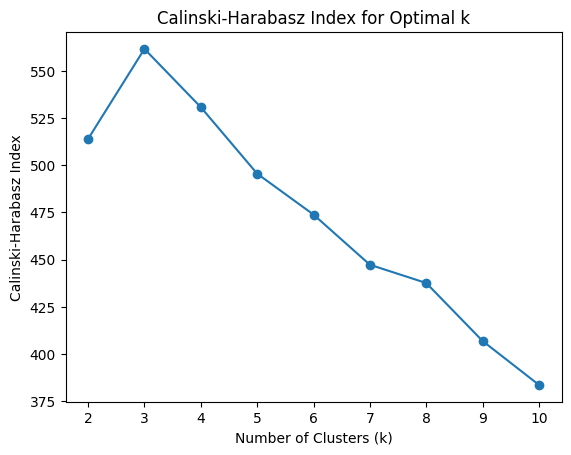

In [ ]:
# Plot the Calinski-Harabasz Index for each k
plt.plot(k_values, calinski_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal k')
plt.xticks(k_values)
plt.show()

## Perform KMeans clustering with the optimal number of clusters


In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k,n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_


## Visualize the clusters and their centers


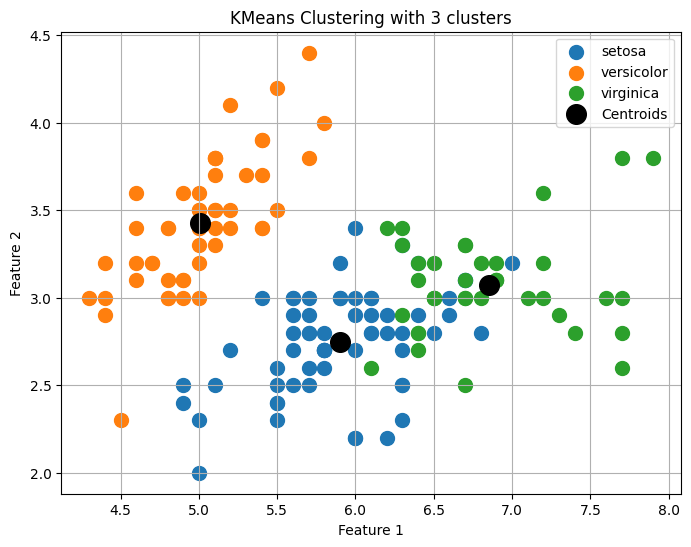

In [ ]:
# Visualize the clusters and their centers
plt.figure(figsize=(8, 6))

# Plot data points with cluster color
for i in range(optimal_k):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'{target_names[i]}',s=100)

# Plot cluster centers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='black', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KMeans Clustering with {optimal_k} clusters')
plt.legend()
plt.grid(True)
plt.show()